# **PART2**

**Visualize the optimization process.**

Defining models and pre-setup


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

# Load and preprocess the MNIST dataset
(x_train, y_train), (_, _) = datasets.mnist.load_data()
x_train = x_train / 255.0 

# Function to be simulated
subset_size = 100
selected_indices = np.random.choice(len(x_train), size=subset_size, replace=False)

def nonlinear_function(x):
    return x.mean(axis=(1, 2)) + np.random.normal(0, 0.1, size=x.shape[0])

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x.mean(axis=(1, 2))))

y_train_nonlinear = nonlinear_function(x_train[selected_indices])
x_train_nonlinear = x_train[selected_indices]

y_train_sigmoid = sigmoid_function(x_train[selected_indices])
x_train_sigmoid = x_train[selected_indices]

def create_dnn_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)), 
        layers.Dense(28, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def create_cnn_model():
    model = models.Sequential([
        layers.Reshape((28, 28, 1), input_shape=(28, 28)), 
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def create_rnn_model():
    model = models.Sequential([
        layers.Reshape((28, 28), input_shape=(28, 28)),  
        layers.SimpleRNN(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

11490434/11490434 [==============================] - 2s 0us/step


Collect weights

In [ ]:
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

class WeightsCollector(Callback):
    def __init__(self, interval=3):
        super(WeightsCollector, self).__init__()
        self.interval = interval
        self.weights_history = []
        self.loss_history = []

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.interval == 0:
            self.weights_history.append(self.model.get_weights())
            self.loss_history.append(logs.get('loss'))

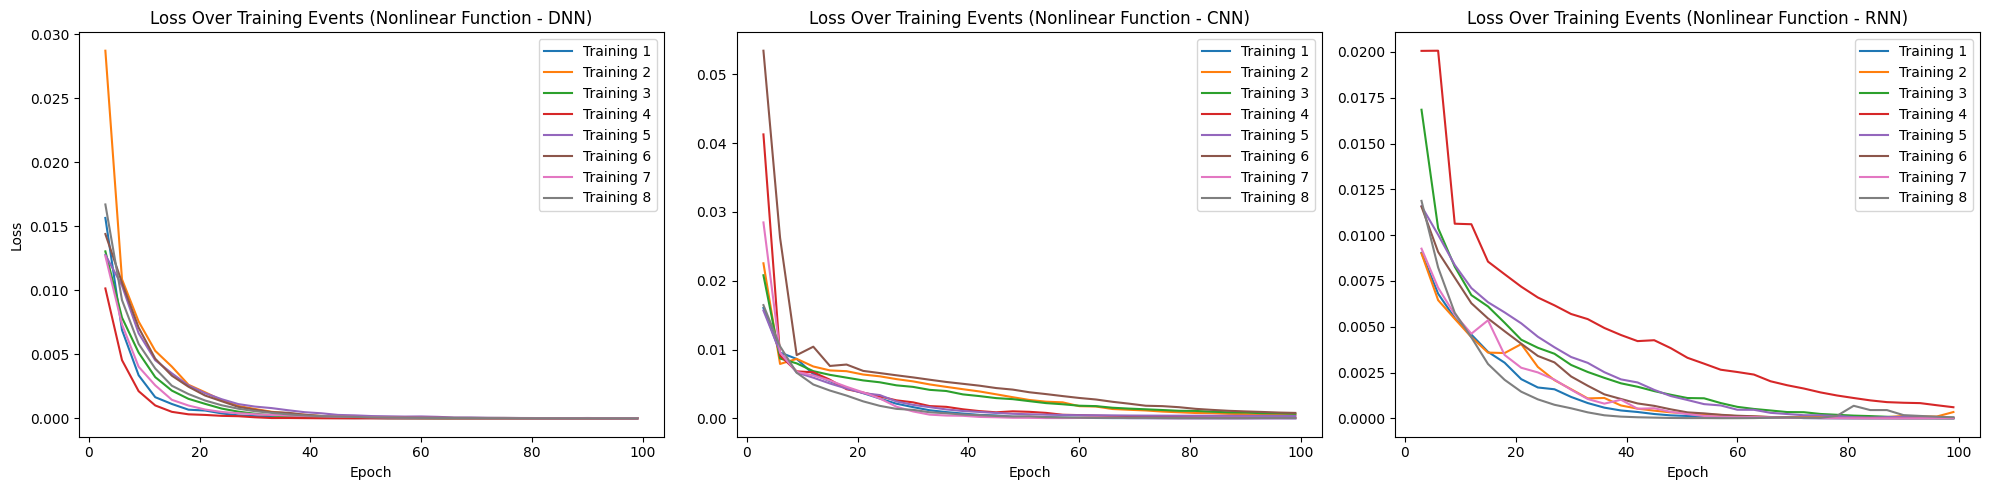

In [ ]:
num_training_events = 8
model_types = ['DNN', 'CNN', 'RNN']
#Non-Linear
all_weights = {model_type: [] for model_type in model_types}
all_losses = {model_type: [] for model_type in model_types}

for model_type in model_types:
    for i in range(num_training_events):
        if model_type == 'DNN':
            model = create_dnn_model()
            x_train_used = x_train_nonlinear
            y_train_used = y_train_nonlinear
        elif model_type == 'CNN':
            model = create_cnn_model()
            x_train_used = x_train_nonlinear.reshape(-1, 28, 28, 1)  # Reshape for CNN
            y_train_used = y_train_nonlinear
        elif model_type == 'RNN':
            model = create_rnn_model()
            x_train_used = x_train_nonlinear
            y_train_used = y_train_nonlinear

        weights_collector = WeightsCollector(interval=3)

        # Train the model
        model.fit(x_train_used, y_train_used, epochs=100, verbose=0, callbacks=[weights_collector])

        # Collect weights and losses after training
        all_weights[model_type].append(weights_collector.weights_history)
        all_losses[model_type].append(weights_collector.loss_history)

n_models = len(model_types)

fig, axes = plt.subplots(1, n_models, figsize=(20, 5)) 

for i, model_type in enumerate(model_types):
    ax = axes[i] 
    for j, losses in enumerate(all_losses[model_type]):
        epochs_collected = range(3, 101, 3)  
        ax.plot(epochs_collected, losses, label=f'Training {j+1}')

    ax.set_title(f'Loss Over Training Events (Nonlinear Function - {model_type})')
    ax.set_xlabel('Epoch')
    if i == 0:  
        ax.set_ylabel('Loss')
    ax.legend()

plt.tight_layout() 
plt.show()




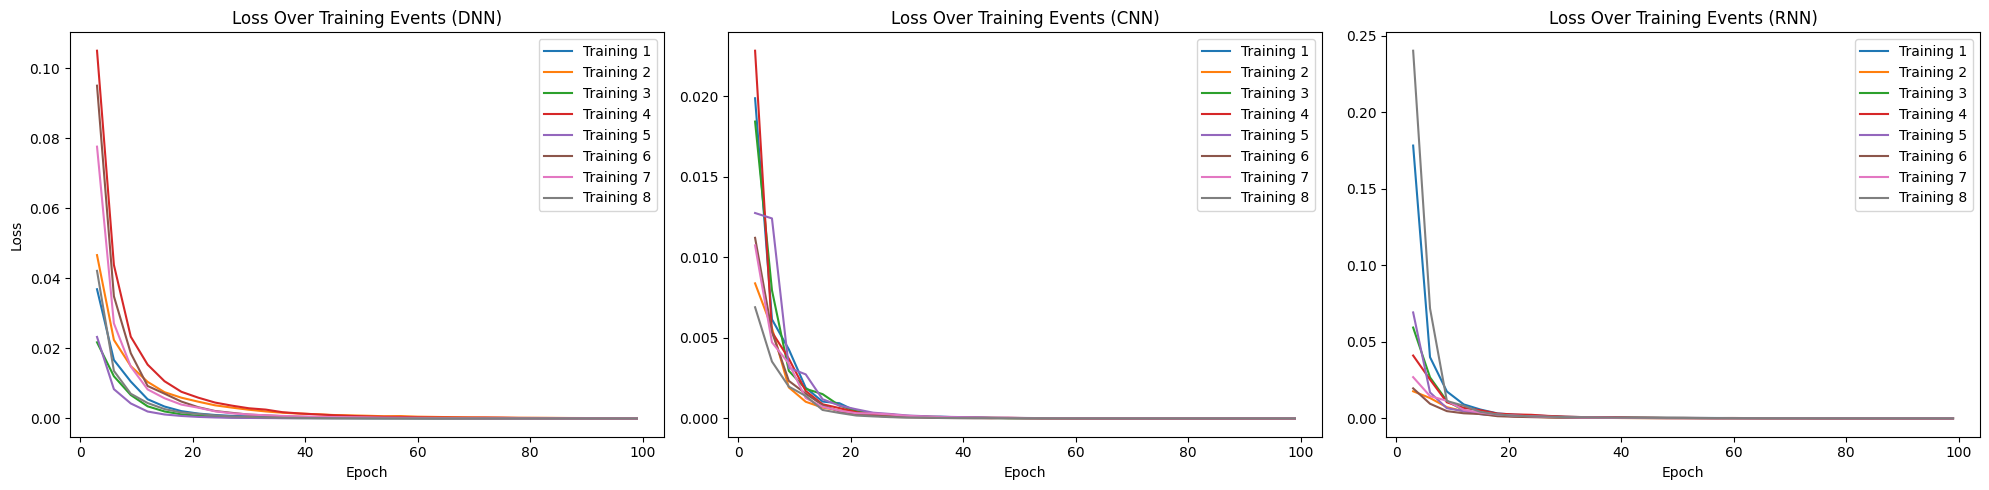

In [ ]:
#Sigmoid

all_weights_sigmoid = {model_type: [] for model_type in model_types}
all_losses_sigmoid = {model_type: [] for model_type in model_types}

for model_type in model_types:
    for i in range(num_training_events):
        if model_type == 'DNN':
            model = create_dnn_model()
            x_train_used = x_train_sigmoid
            y_train_used = y_train_sigmoid
        elif model_type == 'CNN':
            model = create_cnn_model()
            x_train_used = x_train_sigmoid.reshape(-1, 28, 28, 1) 
            y_train_used = y_train_sigmoid
        elif model_type == 'RNN':
            model = create_rnn_model()
            x_train_used = x_train_sigmoid
            y_train_used = y_train_sigmoid

        weights_collector = WeightsCollector(interval=3)

        model.fit(x_train_used, y_train_used, epochs=100, verbose=0, callbacks=[weights_collector])
        all_weights_sigmoid[model_type].append(weights_collector.weights_history)
        all_losses_sigmoid[model_type].append(weights_collector.loss_history)

n_models = len(model_types)

fig, axes = plt.subplots(1, n_models, figsize=(20, 5))

for i, model_type in enumerate(model_types):
    ax = axes[i] 
    for j, losses in enumerate(all_losses_sigmoid[model_type]):
        epochs_collected = range(3, 101, 3) 
        ax.plot(epochs_collected, losses, label=f'Training {j+1}')

    ax.set_title(f'Loss Over Training Events ({model_type})')
    ax.set_xlabel('Epoch')
    if i == 0: 
        ax.set_ylabel('Loss')
    ax.legend()

plt.tight_layout()  
plt.show()